In [1]:
# Download data
import pandas as pd
import get_data
LoadData=True

if LoadData:
    get_data.get_data()

Baixando arquivos brasil.io...


In [2]:
dfSP = pd.read_csv("data/dados_municipios_SP.csv")
dfSP
dfSP.query('DRS == "{}"'.format('DRS 01 - Grande São Paulo'))

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,popEst,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,DRS
4935,2020-09-11,SP,Arujá,city,1689,72,164,True,89824.0,3503901.0,1880.34378,0.0426,DRS 01 - Grande São Paulo
4936,2020-09-10,SP,Arujá,city,1670,73,163,False,89824.0,3503901.0,1859.19131,0.0437,DRS 01 - Grande São Paulo
4937,2020-09-09,SP,Arujá,city,1662,73,162,False,89824.0,3503901.0,1850.28500,0.0439,DRS 01 - Grande São Paulo
4938,2020-09-08,SP,Arujá,city,1655,72,161,False,89824.0,3503901.0,1842.49198,0.0435,DRS 01 - Grande São Paulo
4939,2020-09-04,SP,Arujá,city,1616,72,160,False,89824.0,3503901.0,1799.07374,0.0446,DRS 01 - Grande São Paulo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80237,2020-03-30,SP,Vargem Grande Paulista,city,2,1,5,False,52597.0,3556453.0,3.80250,0.5000,DRS 01 - Grande São Paulo
80238,2020-03-27,SP,Vargem Grande Paulista,city,2,1,4,False,52597.0,3556453.0,3.80250,0.5000,DRS 01 - Grande São Paulo
80239,2020-03-26,SP,Vargem Grande Paulista,city,1,1,3,False,52597.0,3556453.0,1.90125,1.0000,DRS 01 - Grande São Paulo
80240,2020-03-25,SP,Vargem Grande Paulista,city,0,1,2,False,52597.0,3556453.0,NaN,0.0000,DRS 01 - Grande São Paulo


In [3]:
# lista DRSs
DRS = list(dfSP["DRS"].unique())
DRS.remove("Indefinido")
DRS

['DRS 09 - Marília',
 'DRS 15 - São José do Rio Preto',
 'DRS 14 - São João da Boa Vista',
 'DRS 06 - Bauru',
 'DRS 16 - Sorocaba',
 'DRS 11 - Presidente Prudente',
 'DRS 05 - Barretos',
 'DRS 13 - Ribeirão Preto',
 'DRS 02 - Araçatuba',
 'DRS 07 - Campinas',
 'DRS 03 - Araraquara',
 'DRS 10 - Piracicaba',
 'DRS 17 - Taubaté',
 'DRS 08 - Franca',
 'DRS 01 - Grande São Paulo',
 'DRS 12 - Registro',
 'DRS 04 - Baixada Santista']

In [4]:
def load_confirmed(districtRegion):
    dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
    df = pd.read_csv('./data/DRS_confirmados.csv',delimiter=',',parse_dates=True, date_parser=dateparse)
    y=[]
    x=[]
    for i in range(0,len(df.date)):
        y.append(df[districtRegion].values[i])
        x.append(df.date.values[i])
    df2=pd.DataFrame(data=y,index=x,columns=[""])
#     df2=df2[self.start_date:]
    return df2

def load_dead(districtRegion):
    dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
    df = pd.read_csv('./data/DRS_mortes.csv',delimiter=',',parse_dates=True, date_parser=dateparse)
    y=[]
    x=[]
    for i in range(0,len(df.date)):
        y.append(df[districtRegion].values[i])
        x.append(df.date.values[i])
    df2=pd.DataFrame(data=y,index=x,columns=[""])
#     df2=df2[self.start_date:]
    return df2

In [5]:
dfCases=load_confirmed('DRS 01 - Grande São Paulo')
dfCases = dfCases.dropna()
dfCases.tail(20)
dfCasesRaw=dfCases


In [6]:
import numpy as np

dfCases.index = pd.DatetimeIndex(dfCases.index)
dfCases = dfCases.reindex(pd.date_range(dfCases.index.min(), dfCases.index.max()), fill_value=np.nan)
dfCases = dfCases.interpolate(method='akima', axis=0).ffill().bfill()
dfCases=dfCases.astype(int)

dfCases.tail(30)

,
2020-08-13,358184
2020-08-14,362949
2020-08-15,366080
2020-08-16,366908
2020-08-17,367591
2020-08-18,371019
2020-08-19,374729
2020-08-20,378019
2020-08-21,379555
2020-08-22,385395


In [7]:
dfDeaths=load_dead('DRS 01 - Grande São Paulo')
dfDeaths =dfDeaths.apply (pd.to_numeric, errors='coerce')
dfDeaths = dfDeaths.dropna()
dfDeaths.tail(20)
dfDeathsRaw=dfDeaths

In [8]:
dfDeaths.index = pd.DatetimeIndex(dfDeaths.index)
dfDeaths = dfDeaths.reindex(pd.date_range(dfDeaths.index.min(), dfDeaths.index.max()), fill_value=np.nan)
dfDeaths = dfDeaths.interpolate(method='akima', axis=0).ffill().bfill()
dfDeaths=dfDeaths.astype(int)

dfDeaths.tail(30)

,
2020-08-13,17104
2020-08-14,17261
2020-08-15,17327
2020-08-16,17364
2020-08-17,17383
2020-08-18,17525
2020-08-19,17660
2020-08-20,17846
2020-08-21,17968
2020-08-22,18072


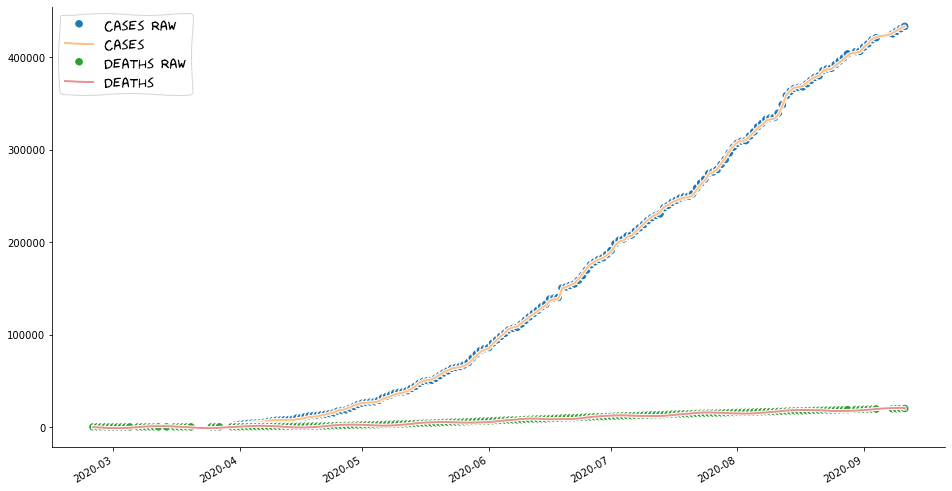

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,9))

with plt.xkcd():        
    dfCasesRaw.plot(ax=ax,label='Cases Raw',style='o')
    dfCases.plot(ax=ax,label='Cases',alpha=0.5)
    dfDeathsRaw.plot(ax=ax,label='Deaths Raw',style='o')
    dfDeaths.plot(ax=ax,label='Deaths',alpha=0.5)
    ax.legend(['Cases Raw','Cases', 'Deaths Raw','Deaths'])
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    plt.show()

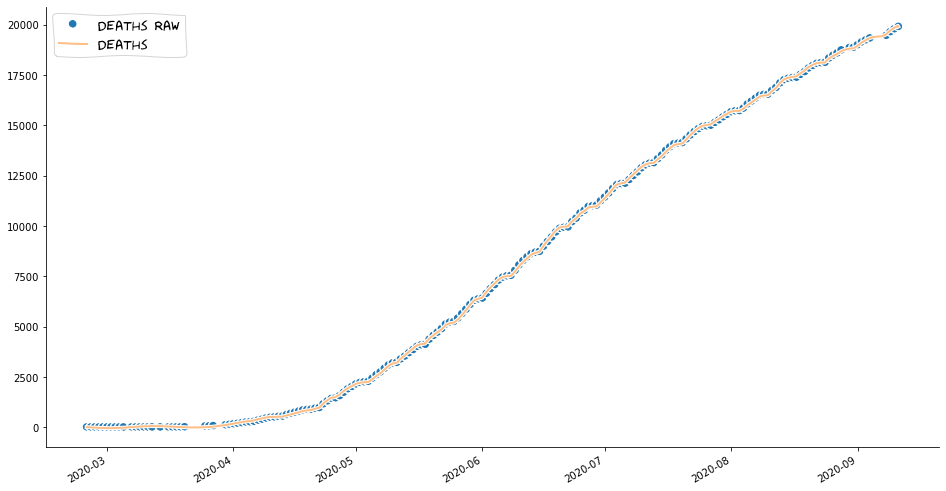

In [30]:
fig, ax = plt.subplots(figsize=(16,9))
with plt.xkcd():
    dfDeathsRaw.plot(ax=ax,label='Deaths Raw',style='o')
    dfDeaths.plot(ax=ax,label='Deaths',alpha=0.5)
    ax.legend(['Deaths Raw','Deaths'])
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    plt.show()

In [11]:
# dfDeaths.index

In [12]:
# dfDeaths.index=dfDeaths.index.astype(str)
# dfDeaths.index